In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import spinmob as sm
import mcphysics as mphys
from scipy.optimize import curve_fit

In [89]:
#Gaussian, where m=peak, o=variance, A=amplitude, B=Linear Coeff., C=Linear Offset
def Gaussian(x, m, o, A, B, C):
    return A*np.exp(-0.5*(((x-m)/o)**2)) + B*x + C

#Curve fits a Gaussian to a given emitter's callibration data curve. The interval determines the width of data
#which the Gaussian fits around. 
def Fit(input_databox, interval, guess):
    xData = np.arange(0, 2048)
    param, cov = curve_fit(Gaussian, xData[guess-interval:guess+interval], 
                           input_databox[guess-interval:guess+interval], p0=[guess, 10, 10, 10, 10])
    error = np.sqrt(np.diag(cov))
    print(param), print(error)
    return [param, error]

def Chi(fitparam, input_databox, interval, guess):
    index = np.arange(guess-interval, guess+interval)
    fit = Gaussian(index, *fitparam)
    out = ((input_databox[guess-interval: guess+interval]-fit)**2/(input_databox[guess-interval: guess+interval])**2)
    return np.sum(out[out < 10**10])

## Angle 125 - Aluminum


[1.13568998e+03 5.07237339e+01 9.22499815e+00 6.60344295e-04
 3.50553307e+00]
[5.85919841e+00 1.02253537e+01 1.80979994e+00 9.42312632e-03
 9.56198329e+00]
82.9672615436845


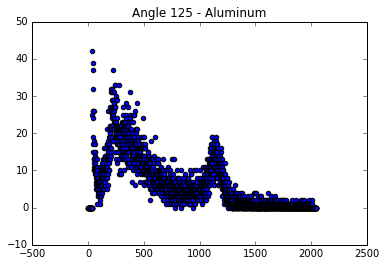

In [95]:
data = mphys.data.load_chn('Compton/Angles/125/02 Aluminum/02 Aluminum 125 degrees 027.Chn')[1]
data += mphys.data.load_chn('Compton/Angles/125/02 Aluminum/02 Aluminum 125 degrees 036.Chn')[1]

plt.scatter(np.arange(0, 2048), data)
plt.title('Angle 125 - Aluminum')

Al_125param = Fit(data, 100, 1125)

print(Chi(Al_125param[0], data, 100, 1125))